## Цель проекта:

Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в зоне риска.

## Задача:

Для достижения поставленной цели было решено создать модель, которая предсказывала бы результаты Гос.экзамена по математике для каждого ученика школы.

Необходимо определить параметры будущей модели. Для этого нужно провести разведывательный анализ данных и составить отчет по его результатам.

**Импортируем библиотеки и модули для анализа**

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import norm

## Первичный анализ данных

In [4]:
df_stud = pd.read_csv('stud_math.csv') 
display(df_stud.head())
df_stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

### Описание данных:

1. ***school*** — аббревиатура школы, в которой учится ученик
2. ***sex*** — пол ученика ('F' - женский, 'M' - мужской)
3. ***age*** — возраст ученика (от 15 до 22)
4. ***address (далее исп. address_home)*** — тип адреса ученика ('U' - городской, 'R' - за городом)
5. ***famsize (family_size)*** — размер семьи('LE3' <= 3, 'GT3' >3)
6. ***Pstatus (parents_status)*** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. ***Medu (mother_education)*** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. ***Fedu (father_education)*** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. ***Mjob (mother_job)*** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. ***Fjob (father_job)*** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. ***reason (reason_school)*** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. ***guardian*** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. ***traveltime (time_to_school)*** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. ***studytime (study_time)*** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. ***failures (fail_not_school)*** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. ***schoolsup (school_support)*** — дополнительная образовательная поддержка (yes или no)
17. ***famsup (family_support)*** — семейная образовательная поддержка (yes или no)
18. ***paid (add_paid_math)*** — дополнительные платные занятия по математике (yes или no)
19. ***activities (activ_not_school)*** — дополнительные внеучебные занятия (yes или no)
20. ***nursery*** — посещал детский сад (yes или no)
21. ***higher*** — хочет получить высшее образование (yes или no)
22. ***internet*** — наличие интернета дома (yes или no)
23. ***romantic (roman_relationship)*** — в романтических отношениях (yes или no)
24. ***famrel (family_relationship)*** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. ***freetime (free_time)*** — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. ***goout (time_friends)*** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. ***health*** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. ***absences (mis_class)*** — количество пропущенных занятий
29. ***score (score_math)*** — баллы по госэкзамену по математике

**в скобках указаны измененные наименования колонок**

In [5]:
df_stud.columns = ['school', 'sex', 'age', 'address_home', 'family_size', 'parents_status',
                   'mother_education', 'father_education','mother_job', 'father_job',
                   'reason_school', 'guardian', 'time_to_school', 'study_time',
                   'fail_not_school', 'school_support', 'family_support', 'add_paid_math',
                   'activ_not_school', 'nursery','studytime_granular', 'higher',
                   'internet', 'roman_relationship', 'family_relationship',
                   'free_time', 'time_friends', 'health', 'mis_class', 'score_math']
display(df_stud.head())

,school,sex,age,address_home,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,studytime_granular,higher,internet,roman_relationship,family_relationship,free_time,time_friends,health,mis_class,score_math
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


# Численные параметры

In [6]:
df_stud.describe()

,age,mother_education,father_education,time_to_school,study_time,fail_not_school,studytime_granular,family_relationship,free_time,time_friends,health,mis_class,score_math
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


**Вывод:**

1. В father_education присутствуют ошибочные значения.
2. Не понятно что показывает studytime_granular, отсутствует в описание, удалить.
3. В family_relationship присутствуют ошибочные значения.
4. В mis_class возможно присутствуют ошибочные значения, или выбросы.

**1. Исправлние ошибок в father_education**

In [7]:
df_stud.father_education.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: father_education, dtype: int64

In [8]:
df_stud[df_stud.father_education > 4] # находим ошибочное значение
df_stud.loc[11, ['father_education']] = 4.0 # замена значения на логически верное

**2. Удаление studytime_granular**

In [9]:
df_stud.drop(['studytime_granular'], inplace=True, axis=1)

**3. Исправление ошибок в family_relationship**

In [10]:
df_stud.family_relationship.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: family_relationship, dtype: int64

In [11]:
df_stud[df_stud.family_relationship < 0] #находим ошибочное значение
df_stud.loc[25, ['family_relationship']] = 1.0 # замена значения на логически верное

**4. Расмотрим столбец mis_class**

In [12]:
df_stud.mis_class.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: mis_class, dtype: int64

В данном столбце присутствуют выбросы.

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: mis_class, dtype: float64

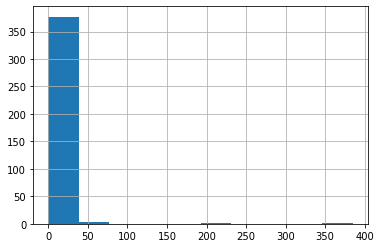

In [13]:
df_stud.mis_class.hist()
df_stud.mis_class.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


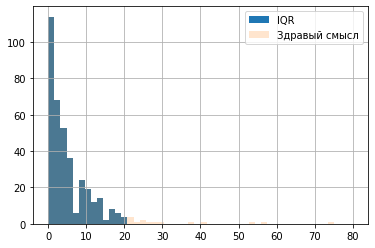

In [14]:
median = df_stud.mis_class.median()
IQR = df_stud.mis_class.quantile(0.75) - df_stud.mis_class.quantile(0.25)
perc25 = df_stud.mis_class.quantile(0.25)
perc75 = df_stud.mis_class.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
df_stud.mis_class.loc[df_stud.mis_class.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 50
                                                                                          , range = (0, 80)
                                                                                          , label = 'IQR')
df_stud.mis_class.loc[df_stud.mis_class <= 100].hist(alpha = 0.2, bins = 50, range = (0, 80),
                                                        label = 'Здравый смысл')
plt.legend();

Как видно, формула выбросов в нашем случае помечает как выбросы потенциально реальные значения, поэтому воспользуемся здравым смыслом. Очевидно, что значения больше 40, это скорее исключения. 

In [15]:
df_stud[df_stud.mis_class > 40]

,school,sex,age,address_home,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,nursery,higher,internet,roman_relationship,family_relationship,free_time,time_friends,health,mis_class,score_math
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,...,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,...,yes,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,...,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,...,no,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


# Категориальные параметры

In [16]:
df_stud.describe(include=['object'])

,school,sex,address_home,family_size,parents_status,mother_job,father_job,reason_school,guardian,school_support,family_support,add_paid_math,activ_not_school,nursery,higher,internet,roman_relationship
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


На первый взляд все данные релевантны, ошибок нет.

В столбцах, кроме school and sex, присутствуют пропуски в данных.

In [17]:
# Отсеиваем нулевые значения

def not_null(column):
    df_stud[column] = df_stud[column].apply(lambda x: None if x == '' else x)

In [18]:
for col in ['school', 'sex', 'address_home', 'family_size', 'parents_status',
            'mother_job', 'father_job', 'reason_school', 'guardian',
            'school_support', 'family_support', 'add_paid_math',
            'activ_not_school', 'nursery', 'higher', 'internet', 'roman_relationship']:
    not_null(col)

## Подробнее расмотрим score_math

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score_math, dtype: float64

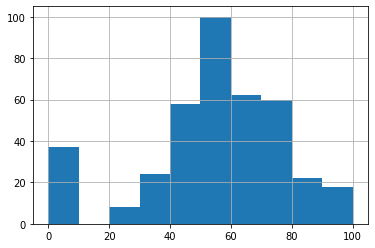

In [19]:
df_stud.score_math.hist()
df_stud.score_math.describe()

In [20]:
df_stud[df_stud.score_math == 0].describe()

,age,mother_education,father_education,time_to_school,study_time,fail_not_school,family_relationship,free_time,time_friends,health,mis_class,score_math
count,37.000000,36.000000,34.000000,32.000000,37.000000,35.000000,34.000000,36.000000,36.000000,35.000000,36.0,37.0
mean,17.054054,2.333333,2.323529,1.500000,1.945946,0.857143,3.823529,3.111111,3.166667,3.657143,0.0,0.0
std,1.311190,1.041976,1.147344,0.718421,0.911225,1.033067,1.028992,0.887300,1.341641,1.304807,0.0,0.0
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0
25%,16.000000,1.750000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,2.000000,3.000000,0.0,0.0
50%,17.000000,2.000000,2.000000,1.000000,2.000000,1.000000,4.000000,3.000000,3.000000,4.000000,0.0,0.0
75%,18.000000,3.000000,3.000000,2.000000,2.000000,1.000000,4.750000,4.000000,4.000000,5.000000,0.0,0.0
max,19.000000,4.000000,4.000000,3.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,0.0,0.0


Студентов набравших 0.0 баллов оказалось - 37 человек. Прогулов у данных студентов не было.
Посмотрим гистограммы распределений остальных показателей.

C:\Users\bou\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\bou\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Здоровье')

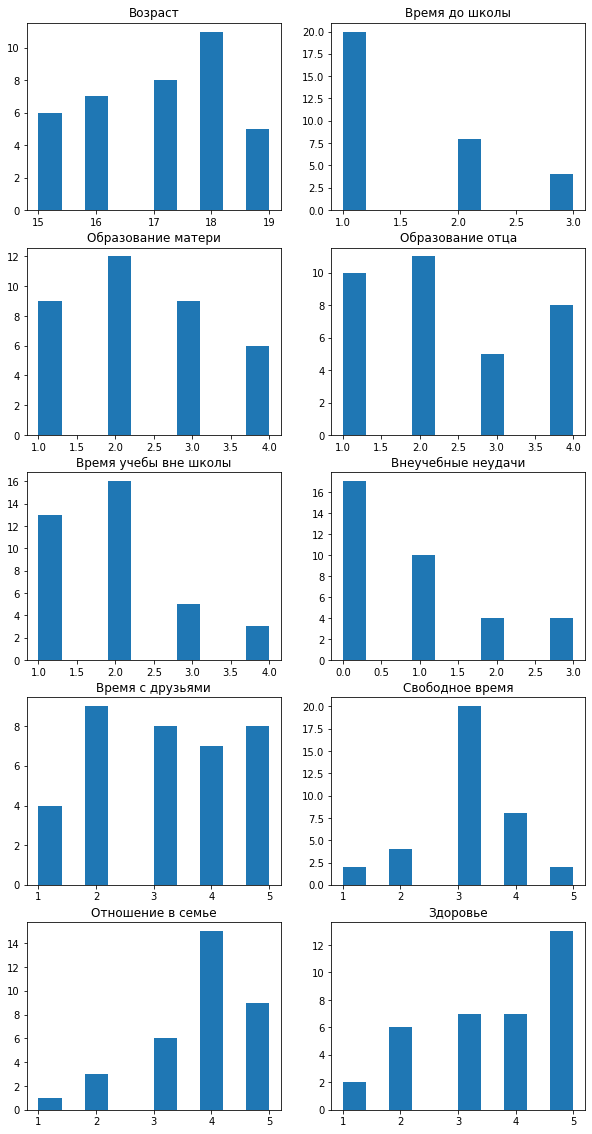

In [21]:
df_null_score = df_stud[df_stud.score_math == 0]

fig, axes = plt.subplots(5, 2, figsize=(10,20))

axes[0][0].hist(df_null_score['age'])
axes[0][0].set_title('Возраст')

axes[0][1].hist(df_null_score['time_to_school'])
axes[0][1].set_title('Время до школы')

axes[1][0].hist(df_null_score['mother_education'])
axes[1][0].set_title('Образование матери')

axes[1][1].hist(df_null_score['father_education'])
axes[1][1].set_title('Образование отца')

axes[2][0].hist(df_null_score['study_time'])
axes[2][0].set_title('Время учебы вне школы')

axes[2][1].hist(df_null_score['fail_not_school'])
axes[2][1].set_title('Внеучебные неудачи')

axes[3][0].hist(df_null_score['time_friends'])
axes[3][0].set_title('Время с друзьями')

axes[3][1].hist(df_null_score['free_time'])
axes[3][1].set_title('Свободное время')

axes[4][0].hist(df_null_score['family_relationship'])
axes[4][0].set_title('Отношение в семье')

axes[4][1].hist(df_null_score['health'])
axes[4][1].set_title('Здоровье')

Как видно выше, никаких причин таких низких баллов не наблюдается. 

Вероятно такие низкие баллы были получены в результате неявки на экзамент.

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [1.0, 109.0].


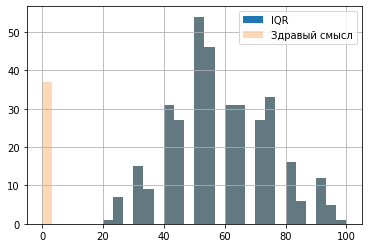

In [22]:
# Проверим есть ли выбросы в столбце score_math

median = df_stud.score_math.median()
IQR = df_stud.score_math.quantile(0.75) - df_stud.score_math.quantile(0.25)
perc25 = df_stud.score_math.quantile(0.25)
perc75 = df_stud.score_math.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.3*IQR, l=perc75 + 1.3*IQR))
df_stud.score_math.loc[df_stud.score_math.between(perc25 - 1.3*IQR, perc75 + 1.3*IQR)].hist(bins = 30
                                                                                              , range = (0, 100), 
                                                                                             label = 'IQR')
df_stud.score_math.loc[df_stud.score_math <= 100].hist(alpha = 0.3, bins = 30, range = (0, 100),
                                                        label = 'Здравый смысл')
plt.legend();

**Вывод:**

Так как нуливые значения скорей всего связаны с неявкой на экзамен, их можно опусть. По причине того, что они не дают нам информации о реальных знаниях студентов.

In [23]:
# убираем экстремально низкие оценки
df_stud = df_stud.loc[df_stud.score_math.between(perc25 - 1.3*IQR, perc75 + 1.3*IQR)]

## Корреляционный анализ

Выясним, какие столбцы коррелируют с оценкой за экзамен по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

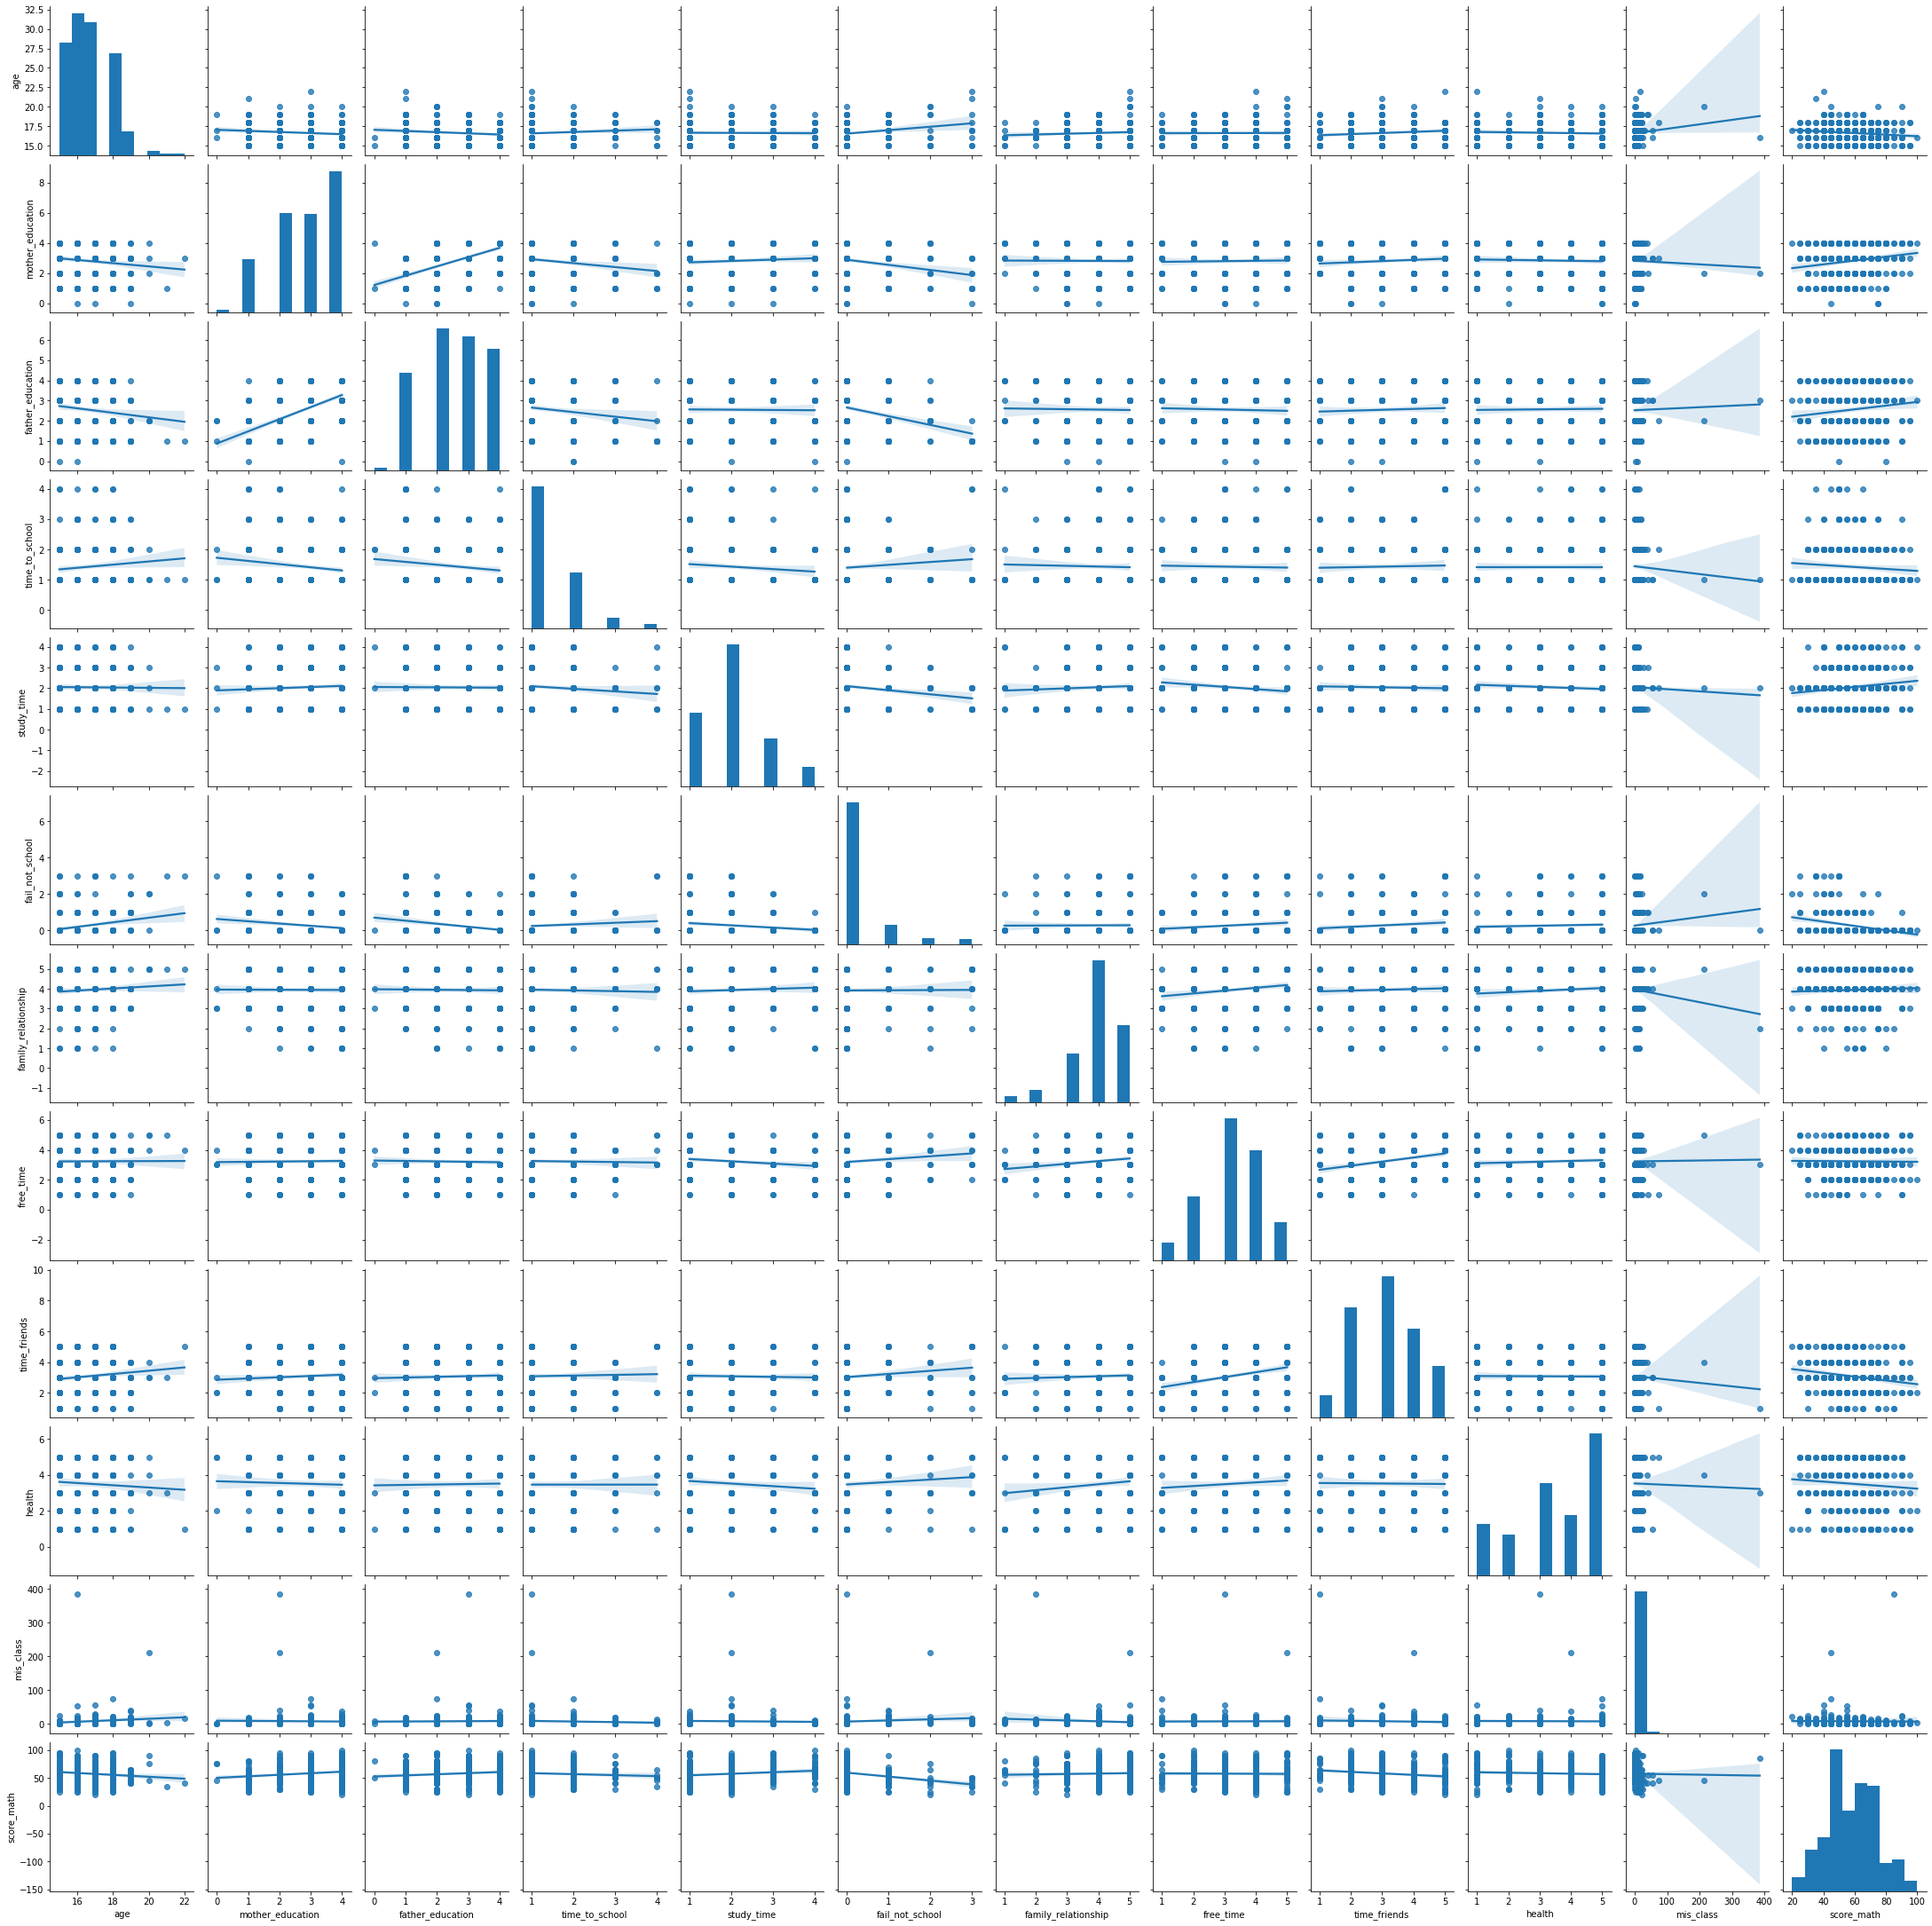

In [24]:
sns.pairplot(df_stud, kind = 'reg')

In [25]:
# Используем для наглядности матрицу корреляций:

df_stud.corr()

,age,mother_education,father_education,time_to_school,study_time,fail_not_school,family_relationship,free_time,time_friends,health,mis_class,score_math
age,1.000000,-0.122979,-0.130010,0.095370,-0.011426,0.235875,0.072918,0.004837,0.123638,-0.056173,0.112599,-0.131542
mother_education,-0.122979,1.000000,0.606270,-0.165394,0.070533,-0.205944,-0.006133,0.021002,0.080556,-0.038050,-0.027377,0.186477
father_education,-0.130010,0.606270,1.000000,-0.145471,-0.010779,-0.268901,-0.016694,-0.030449,0.044127,0.018671,0.017545,0.135268
time_to_school,0.095370,-0.165394,-0.145471,1.000000,-0.101490,0.091757,-0.029299,-0.023067,0.029374,-0.000092,-0.047560,-0.075516
study_time,-0.011426,0.070533,-0.010779,-0.101490,1.000000,-0.156406,0.057143,-0.128661,-0.029686,-0.085469,-0.030187,0.142055
fail_not_school,0.235875,-0.205944,-0.268901,0.091757,-0.156406,1.000000,0.006870,0.127391,0.126770,0.064083,0.089541,-0.289377
family_relationship,0.072918,-0.006133,-0.016694,-0.029299,0.057143,0.006870,1.000000,0.158597,0.045341,0.107055,-0.090659,0.040590
free_time,0.004837,0.021002,-0.030449,-0.023067,-0.128661,0.127391,0.158597,1.000000,0.296392,0.072729,0.007748,-0.012457
time_friends,0.123638,0.080556,0.044127,0.029374,-0.029686,0.126770,0.045341,0.296392,1.000000,-0.010343,-0.050616,-0.182286
health,-0.056173,-0.038050,0.018671,-0.000092,-0.085469,0.064083,0.107055,0.072729,-0.010343,1.000000,-0.014308,-0.075340


In [26]:
# Удаляем не коррелирующие показатели

df_stud.drop(['time_to_school', 'family_relationship', 'free_time', 'health', 'mis_class'], inplace=True, axis=1)

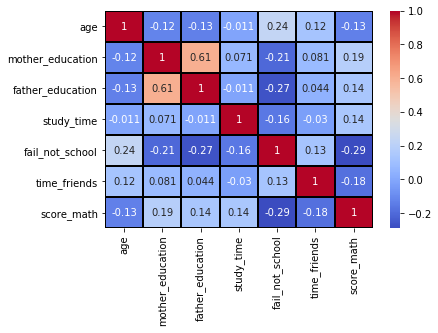

In [28]:
# Для наглядности выведем тепловую карту корреляции

sns.heatmap(df_stud.corr(), annot = True, fmt='.2g', cmap = 'coolwarm', linewidths=1, linecolor='black')

**Вывод:** 

1. Показатели: образования родителей и время на учебу помимо школы с положительным коэффициентом корреляции, что указывает на то, чем выше эти показатели, тем вероятнее студент получит более высокий балл на экзамене по математике.
2. Показатели: возраста, неудач вне школы и время с друзьями, наоборот с отрицательным показателем корреляции. Значит чем выше эти показатели, тем ниже вероятность получить более высокий балл на экзамене по математике.

## Анализ номинативных переменных

Посмотрим, различаются ли распределения баллов за экзамен в зависимости от значения этих переменных.

In [29]:
# Используем функцию для построения графика для каждого столбца

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score_math', 
                data=df_stud.loc[df_stud.loc[:, column].isin(df_stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

Номинативные переменные, которые осталось рассмотреть: school, sex, address_home, family_size, parents_status, mother_job, father_job, reason_school, guardian, school_support, family_support, add_paid_math, activ_not_school, nursery, higher, internet, roman_relationship.

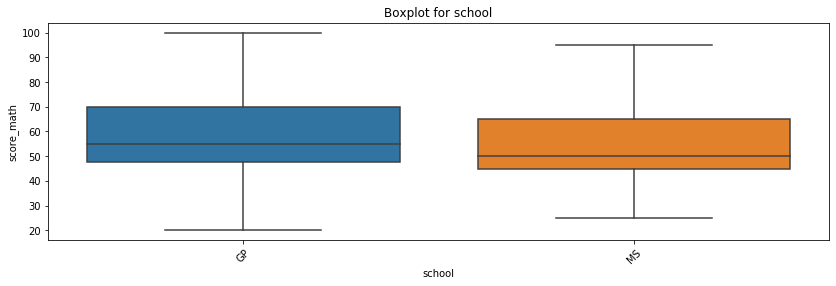

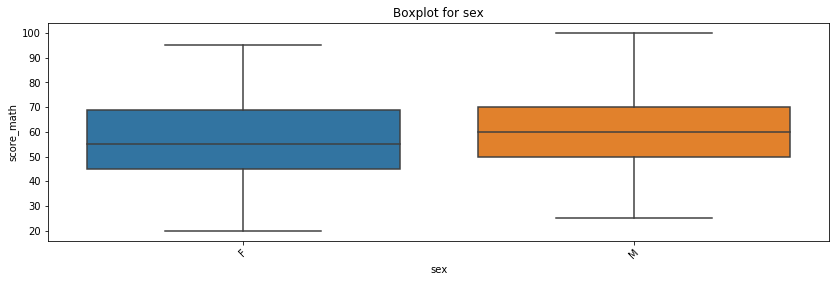

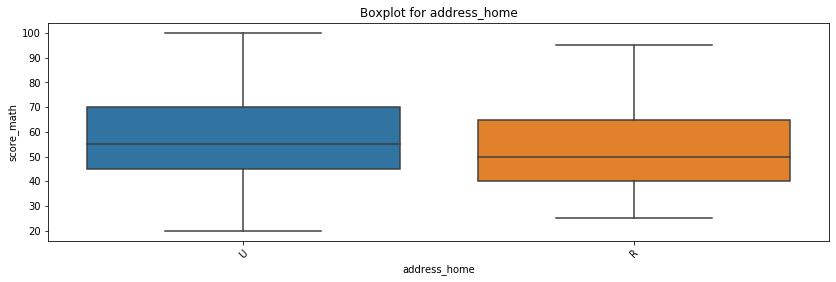

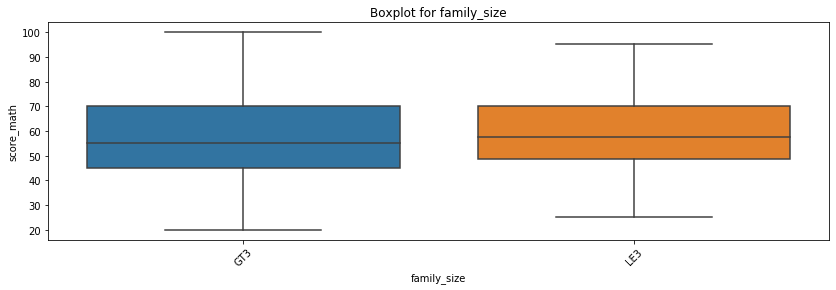

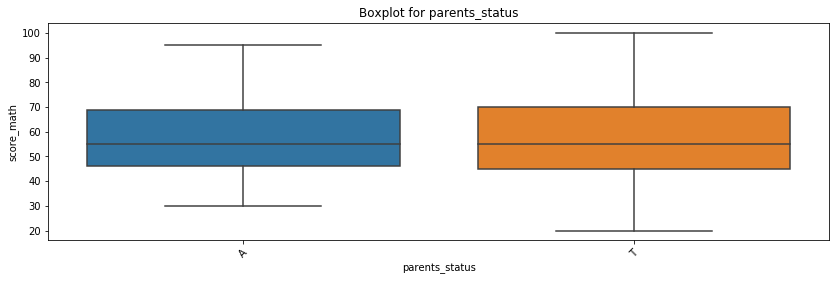

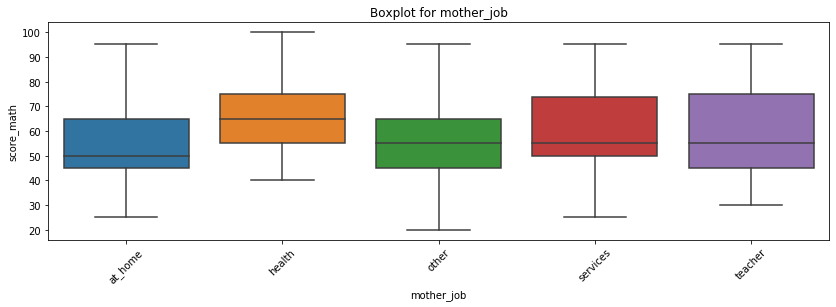

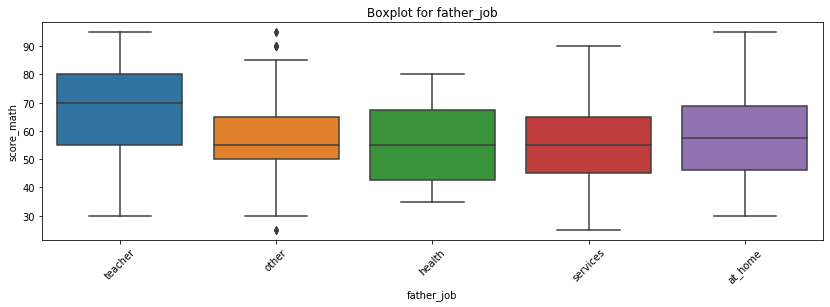

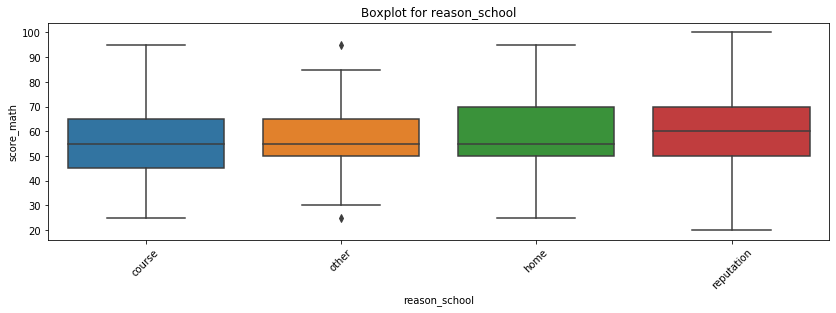

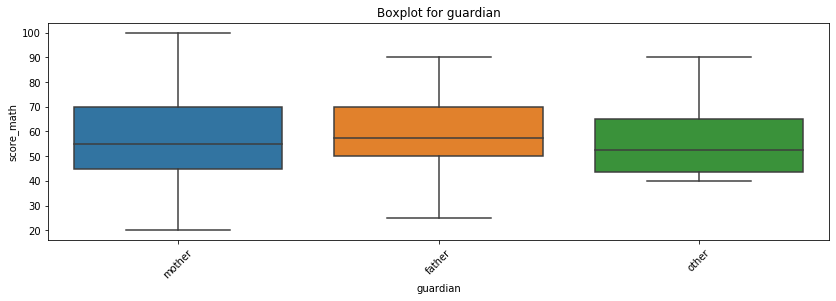

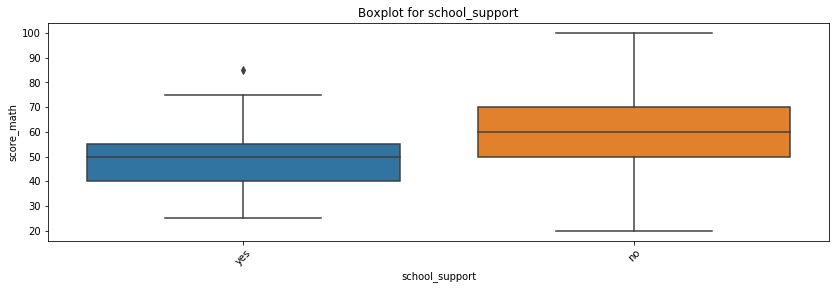

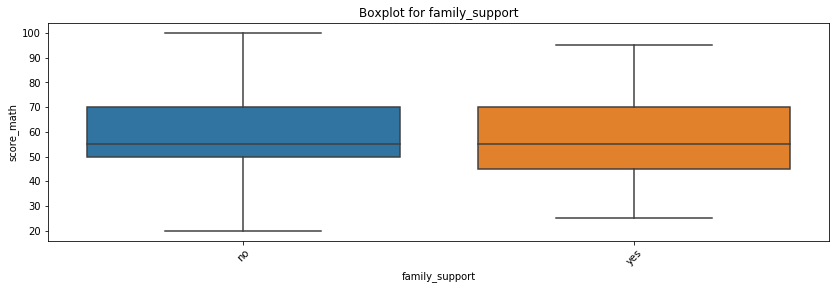

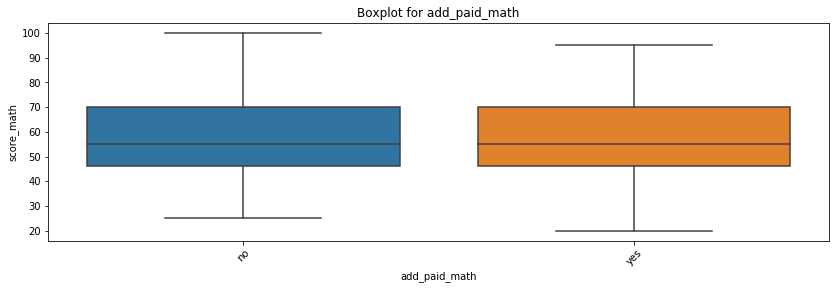

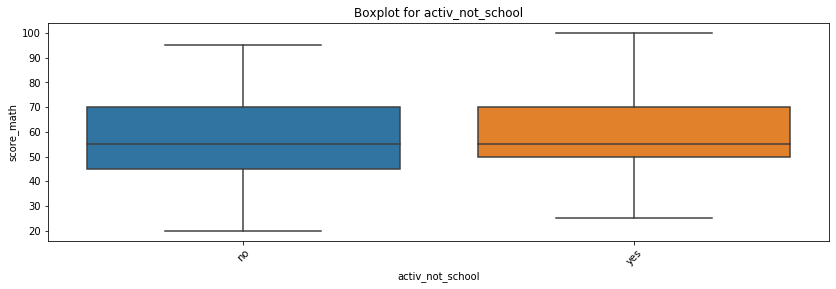

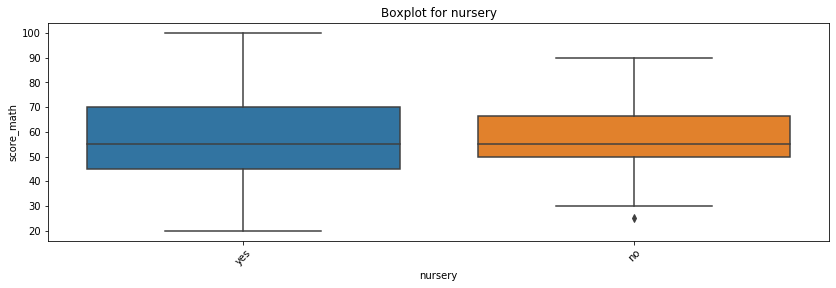

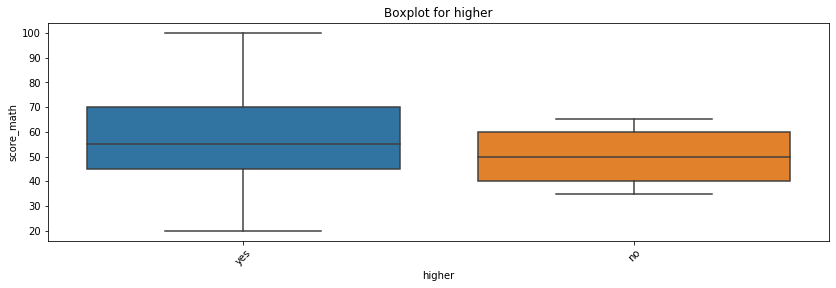

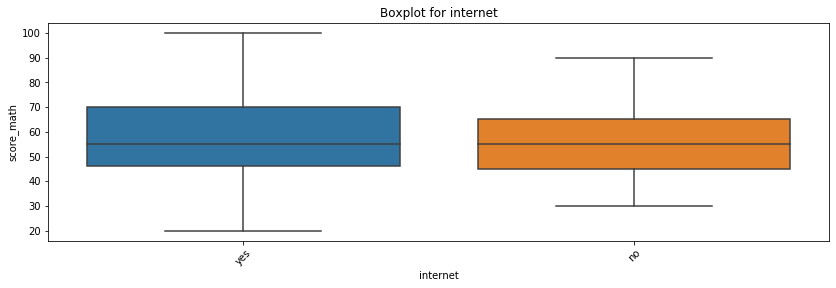

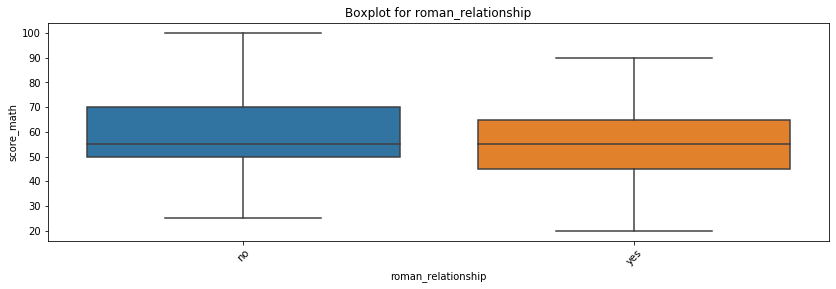

In [30]:
for col in ['school', 'sex', 'address_home', 'family_size', 'parents_status',
            'mother_job', 'father_job', 'reason_school', 'guardian',
            'school_support', 'family_support', 'add_paid_math',
            'activ_not_school', 'nursery', 'higher', 'internet', 'roman_relationship']:
    get_boxplot(col)

По графикам похоже, что параметры: school, sex, address_home, family_size, mother_job, father_job, reason_school, guardian, school_support, higher могут влиять на показатель баллов на экзамене по математике. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения баллов на экзамене по различным параметрам неразличимы:

In [31]:
def get_stat_dif(column):
    cols = df_stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df_stud.loc[df_stud.loc[:, column] == comb[0], 'score_math'], 
                        df_stud.loc[df_stud.loc[:, column] == comb[1], 'score_math']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [32]:
for col in ['school', 'sex', 'address_home', 'family_size', 'parents_status',
            'mother_job', 'father_job', 'reason_school', 'guardian',
            'school_support', 'family_support', 'add_paid_math',
            'activ_not_school', 'nursery', 'higher', 'internet', 'roman_relationship']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address_home
Найдены статистически значимые различия для колонки mother_job
Найдены статистически значимые различия для колонки father_job
Найдены статистически значимые различия для колонки school_support


Как мы видим, серьёзно отличаются 4 параметра: address_home,  mother_job, father_job и  school_support. Оставим эти переменные в датасете для дальнейшего построения модели. 

In [33]:
# Удаляем не нужные для работы данные

df_stud.drop(['school', 'sex', 'family_size', 'parents_status',
              'reason_school', 'guardian','family_support',
              'add_paid_math','activ_not_school', 'nursery',
              'higher', 'internet', 'roman_relationship'], inplace=True, axis=1)

In [38]:
# Итоговый датасет:

display(df_stud.head(10))

,age,address_home,mother_education,father_education,mother_job,father_job,study_time,fail_not_school,school_support,time_friends,score_math
0,18,U,4.0,4.0,at_home,teacher,2.0,0.0,yes,4.0,30.0
1,17,U,1.0,1.0,at_home,other,2.0,0.0,no,3.0,30.0
2,15,U,1.0,1.0,at_home,other,2.0,3.0,yes,2.0,50.0
3,15,U,4.0,2.0,health,NaN,3.0,0.0,no,2.0,75.0
4,16,U,3.0,3.0,other,other,2.0,0.0,no,2.0,50.0
5,16,U,4.0,3.0,services,other,2.0,0.0,no,2.0,75.0
6,16,NaN,2.0,2.0,other,other,2.0,0.0,no,4.0,55.0
7,17,U,4.0,4.0,other,teacher,2.0,0.0,yes,4.0,30.0
8,15,U,3.0,2.0,services,other,2.0,0.0,no,2.0,95.0
9,15,U,3.0,4.0,other,other,2.0,0.0,no,1.0,75.0


# ИТОГИ

В результате EDA для анализа влияния параметров студентов на итоговые баллы на экзамене по математике были получены следующие выводы:

- В данных достаточно мало пустых значений.
- Были найдены ошибочные данный в малом количестве.
- Были обнаружены выбросы в столбце пропущенных занятий.
- Показатели: образования родителей и время на учебу помимо школы с положительной корреляцие, что указывает, чем выше эти показатели, тем вероятнее студент получит более высокий балл на экзамене по математике.
- Показатели: возраста, неудач вне школы и время с друзьями, с отрицательной корреляцией. Значит чем выше эти показатели, тем ниже вероятность получить более высокий балл на экзамене по математике.
- Самые важные параметры, которые предлагается использовать в дальнейшем для постоения модели: **age**(возраст студента), **address_home**(тип адреса), **mother_education**(образование матери), **father_education**(образование отца), **mother_job**(работа матери), **father_job**(работа отца), **study_time**(время учебы вне школы), **fail_not_school**(неудачи вне школы), **school_support**(доп. образовательная поддержка), **time_friends**(время с друзьями), **score_math**(баллы за экзамен по математике)